In [1]:
import pandas as pd
import numpy as np

data=pd.read_excel("Preprocessing.xlsx")
data.head()

,Unnamed: 0,Tweet,Sentiment,tweet_cleansing,tweet_casefolding,tweet_convertnegation,tweet_tokens,tweet_normalization,tweet_stopwordremoval,tweet_stemming
0,0,Banyak otak manusia yang hancur gara gara coro...,Negatif,Banyak otak manusia yang hancur gara gara coro...,banyak otak manusia yang hancur gara gara coro...,banyak otak manusia yang hancur gara gara coro...,"['banyak', 'otak', 'manusia', 'yang', 'hancur'...","['banyak', 'otak', 'manusia', 'yang', 'hancur'...","['otak', 'manusia', 'hancur', 'gara', 'gara', ...","['otak', 'manusia', 'hancur', 'gara', 'gara', ..."
1,1,Segeralah beranjak dari negeri ini hai corona ...,Positif,Segeralah beranjak dari negeri ini hai corona ...,segeralah beranjak dari negeri ini hai corona ...,segeralah beranjak dari negeri ini hai corona ...,"['segeralah', 'beranjak', 'dari', 'negeri', 'i...","['segeralah', 'beranjak', 'dari', 'negeri', 'i...","['segeralah', 'beranjak', 'negeri', 'hai', 'co...","['segera', 'anjak', 'negeri', 'hai', 'corona',..."
2,2,pas ada corona byk hal yg jd sakitnya ga ngota...,Negatif,pas ada corona byk hal yg jd sakitnya ga ngota...,pas ada corona byk hal yg jd sakitnya ga ngota...,pas ada corona byk hal yg jd sakitnya gangotak...,"['pas', 'ada', 'corona', 'byk', 'hal', 'yg', '...","['pas', 'ada', 'corona', 'banyak', 'hal', 'yan...","['pas', 'corona', 'sakitnya', 'gangotakhem']","['pas', 'corona', 'sakit', 'gangotakhem']"
3,3,corona kapan selese ak mau nonton konser anjim,Negatif,corona kapan selese ak mau nonton konser anjim,corona kapan selese ak mau nonton konser anjim,corona kapan selese ak mau nonton konser anjim,"['corona', 'kapan', 'selese', 'ak', 'mau', 'no...","['corona', 'kapan', 'selese', 'aku', 'mau', 'm...","['corona', 'selese', 'menonton', 'konser', 'an...","['corona', 'selese', 'tonton', 'konser', 'anjim']"
4,4,pemerintah plin plan ngasih izin mudik nggak i...,Negatif,pemerintah plin plan ngasih izin mudik nggak i...,pemerintah plin plan ngasih izin mudik nggak i...,pemerintah plin plan ngasih izin mudik nggakit...,"['pemerintah', 'plin', 'plan', 'ngasih', 'izin...","['pemerintah', 'plin', 'plan', 'kasih', 'izin'...","['pemerintah', 'plin', 'plan', 'kasih', 'izin'...","['perintah', 'plin', 'plan', 'kasih', 'izin', ..."


In [2]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data["tweet_preprocessing"] = data["tweet_stemming"].apply(join_text_list)
data["tweet_preprocessing"].head()

0    otak manusia hancur gara gara corona ku sian b...
1    segera anjak negeri hai corona didik betapa hi...
2                         pas corona sakit gangotakhem
3                    corona selese tonton konser anjim
4    perintah plin plan kasih izin mudik nggakitu l...
Name: tweet_preprocessing, dtype: object

In [3]:
datapreprocessing= data.drop(columns=['tweet_cleansing','tweet_casefolding','tweet_convertnegation','tweet_tokens','tweet_normalization','tweet_stopwordremoval','tweet_stemming'])
datapreprocessing.head()

,Unnamed: 0,Tweet,Sentiment,tweet_preprocessing
0,0,Banyak otak manusia yang hancur gara gara coro...,Negatif,otak manusia hancur gara gara corona ku sian b...
1,1,Segeralah beranjak dari negeri ini hai corona ...,Positif,segera anjak negeri hai corona didik betapa hi...
2,2,pas ada corona byk hal yg jd sakitnya ga ngota...,Negatif,pas corona sakit gangotakhem
3,3,corona kapan selese ak mau nonton konser anjim,Negatif,corona selese tonton konser anjim
4,4,pemerintah plin plan ngasih izin mudik nggak i...,Negatif,perintah plin plan kasih izin mudik nggakitu l...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

doc = datapreprocessing['tweet_preprocessing']

#vocabulary
cvector = CountVectorizer()
cvector.fit(doc)

#TF vector
vectorizer = CountVectorizer().fit_transform(doc)
#Normalize TF vector
norm_count = normalize(vectorizer,norm='l1', axis=1)

#IDF vector
tfidf = TfidfVectorizer()
tf_idf1 = tfidf.fit_transform(doc)

#TFIDF vector
tf_idf = norm_count.multiply(tfidf.idf_)

In [5]:
#hasil proses transformasi
print (cvector.vocabulary_)

{'otak': 3118, 'manusia': 2594, 'hancur': 1644, 'gara': 1420, 'corona': 798, 'ku': 2325, 'sian': 3770, 'banar': 328, 'sabar': 3569, 'segera': 3657, 'anjak': 152, 'negeri': 2830, 'hai': 1624, 'didik': 957, 'betapa': 490, 'hidup': 1692, 'peduli': 3208, 'sehat': 3659, 'bersih': 475, 'syukur': 3951, 'selamat': 3674, 'jalan': 1890, 'covid': 827, 'pas': 3187, 'sakit': 3586, 'gangotakhem': 1399, 'selese': 3681, 'tonton': 4221, 'konser': 2261, 'anjim': 161, 'perintah': 3252, 'plin': 3315, 'plan': 3308, 'kasih': 2080, 'izin': 1873, 'mudik': 2766, 'nggakitu': 2931, 'lucu': 2518, 'disalahin': 1008, 'gakpemerintah': 1350, 'gakmasyarakat': 1332, 'anjing': 164, 'kgn': 2199, 'ms': 2759, 'sebentar': 3644, 'puasa': 3397, 'lebaran': 2435, 'lgtapi': 2467, 'negara': 2827, 'indonesia': 1797, 'cinta': 759, 'gakhilangkapan': 1316, 'hilang': 1700, 'ny': 3024, 'indonesiamasyarakat': 1799, 'damai': 880, 'ayo': 290, 'seleseufd': 3682, 'jelek': 1954, 'udahan': 4296, 'konserufd': 2263, 'positif': 3341, 'negatif': 

In [6]:
print (vectorizer)

  (0, 328)	1
  (0, 798)	1
  (0, 1420)	2
  (0, 1644)	1
  (0, 2325)	1
  (0, 2594)	1
  (0, 3118)	1
  (0, 3569)	1
  (0, 3770)	1
  (1, 152)	1
  (1, 475)	1
  (1, 490)	2
  (1, 798)	1
  (1, 827)	1
  (1, 957)	1
  (1, 1624)	1
  (1, 1692)	2
  (1, 1890)	1
  (1, 2830)	1
  (1, 3208)	1
  (1, 3657)	1
  (1, 3659)	1
  (1, 3674)	1
  (1, 3951)	1
  (2, 798)	1
  :	:
  (1623, 47)	1
  (1623, 388)	1
  (1623, 392)	2
  (1623, 798)	1
  (1623, 856)	1
  (1623, 1454)	1
  (1623, 1455)	1
  (1623, 2678)	1
  (1623, 2992)	1
  (1623, 3916)	1
  (1623, 4062)	1
  (1623, 4084)	1
  (1623, 4327)	1
  (1624, 338)	1
  (1624, 499)	1
  (1624, 798)	1
  (1624, 1094)	1
  (1624, 1104)	1
  (1624, 1420)	1
  (1624, 1477)	1
  (1624, 2338)	1
  (1624, 3187)	1
  (1624, 3557)	1
  (1624, 3966)	1
  (1624, 4474)	1


In [7]:
#Nilai TF
print ("\t    Nilai TF")
print (norm_count)

	    Nilai TF
  (0, 328)	0.1
  (0, 798)	0.1
  (0, 1420)	0.2
  (0, 1644)	0.1
  (0, 2325)	0.1
  (0, 2594)	0.1
  (0, 3118)	0.1
  (0, 3569)	0.1
  (0, 3770)	0.1
  (1, 152)	0.058823529411764705
  (1, 475)	0.058823529411764705
  (1, 490)	0.11764705882352941
  (1, 798)	0.058823529411764705
  (1, 827)	0.058823529411764705
  (1, 957)	0.058823529411764705
  (1, 1624)	0.058823529411764705
  (1, 1692)	0.11764705882352941
  (1, 1890)	0.058823529411764705
  (1, 2830)	0.058823529411764705
  (1, 3208)	0.058823529411764705
  (1, 3657)	0.058823529411764705
  (1, 3659)	0.058823529411764705
  (1, 3674)	0.058823529411764705
  (1, 3951)	0.058823529411764705
  (2, 798)	0.25
  :	:
  (1623, 47)	0.07142857142857142
  (1623, 388)	0.07142857142857142
  (1623, 392)	0.14285714285714285
  (1623, 798)	0.07142857142857142
  (1623, 856)	0.07142857142857142
  (1623, 1454)	0.07142857142857142
  (1623, 1455)	0.07142857142857142
  (1623, 2678)	0.07142857142857142
  (1623, 2992)	0.07142857142857142
  (1623, 3916)	0.071428571

In [8]:
#IDF
print ("\t\t\t    Nilai IDF")
print (tfidf.idf_[496:592])

			    Nilai IDF
[7.70073111 7.295266   7.70073111 7.70073111 7.70073111 5.99598302
 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111
 7.70073111 7.70073111 7.70073111 7.70073111 7.295266   7.70073111
 4.95989109 7.00758393 7.70073111 7.70073111 7.70073111 7.70073111
 7.00758393 7.70073111 7.295266   7.70073111 7.70073111 7.295266
 7.70073111 5.90897164 7.70073111 7.295266   4.26674391 7.70073111
 4.5872158  7.70073111 7.70073111 7.295266   7.70073111 5.39814602
 7.70073111 6.78444038 7.70073111 7.70073111 7.295266   4.83853023
 6.78444038 6.31443675 7.70073111 5.82892893 7.70073111 7.295266
 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111
 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111
 7.70073111 7.70073111 7.295266   7.70073111 7.70073111 7.70073111
 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111 7.70073111
 6.44796814 7.70073111 5.82892893 7.70073111 7.70073111 6.19665371
 7.00758393 7.70073111 6.44796814 7.70073111 7.70

In [9]:
#TFIDF
print ("\t    Nilai TFIDF")
print (tf_idf)

	    Nilai TFIDF
  (0, 328)	0.770073110954781
  (0, 798)	0.10491592359580836
  (0, 1420)	0.940999767198764
  (0, 1644)	0.6602118820879701
  (0, 2325)	0.5908971640319756
  (0, 2594)	0.4782960377463532
  (0, 3118)	0.5398146016553765
  (0, 3569)	0.6784440377673656
  (0, 3770)	0.770073110954781
  (1, 152)	0.45298418291457704
  (1, 475)	0.35831136453610063
  (1, 490)	0.9059683658291541
  (1, 798)	0.06171524917400491
  (1, 827)	0.27115815624644085
  (1, 957)	0.41221081935222736
  (1, 1624)	0.3883599306399824
  (1, 1692)	0.5726491488813641
  (1, 1890)	0.27825392023400647
  (1, 2830)	0.31466799131672546
  (1, 3208)	0.39908472809845036
  (1, 3657)	0.41221081935222736
  (1, 3659)	0.2672782757880998
  (1, 3674)	0.31466799131672546
  (1, 3951)	0.34287817250860114
  (2, 798)	0.26228980898952087
  :	:
  (1623, 47)	0.5500522221105578
  (1623, 388)	0.4605691529323173
  (1623, 392)	0.8565690024727693
  (1623, 798)	0.07493994542557739
  (1623, 856)	0.4715799157771215
  (1623, 1454)	0.48460288411954683
 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

le = preprocessing.LabelEncoder() 
y = le.fit_transform(data['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(tf_idf,y,test_size=0.2) 
print(X_train.shape) 
print(X_test.shape) 

#crossvalidation 
from sklearn.model_selection import ShuffleSplit 
n_samples = X_train.shape[0] 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) 
print(cv)

(1300, 4549)
(325, 4549)
ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)


In [12]:
parameter_linear={'C':[0.001, 0.01, 0.1, 1, 10, 100]}
parameter_rbf={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
parameter_sigmoid={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'coef0':[0, 1, 5, 8, 10]}
parameter_poly={'C':[0.001, 0.01, 0.1, 1, 10, 100 ],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
              'coef0':[0, 1, 5, 8, 10],
              'degree':[0, 1, 2, 3]}

In [13]:
#import library modeling
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [14]:
#Import library evaluasi
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
#Penggunaan Kernel Linear
svclassifier_linear = SVC(kernel='linear') 
print('svclassifier_linear') 

#Implement SVM dengan Cross Validation 
model_linear = GridSearchCV(estimator=svclassifier_linear, param_grid=parameter_linear, cv=cv) 
model_linear.fit(X_train, y_train)

svclassifier_linear


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [16]:
#LINEAR
y_pred_linear = model_linear.predict(X_test)
print("\t\t  *EVALUASI KERNEL LINEAR*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nReport:\n", classification_report(y_test, y_pred_linear))
print("Best Parameters:", model_linear.best_params_)

		  *EVALUASI KERNEL LINEAR*
Confusion Matrix:
 [[288   3]
 [ 18  16]]

Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       291
           1       0.84      0.47      0.60        34

    accuracy                           0.94       325
   macro avg       0.89      0.73      0.78       325
weighted avg       0.93      0.94      0.93       325

Best Parameters: {'C': 10}


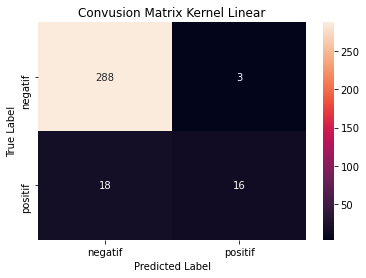

In [17]:
#LINEAR
cm=confusion_matrix(y_test, y_pred_linear)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Linear")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
df_linear = pd.DataFrame(model_linear.cv_results_)
df_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209613,0.118335,0.041002,0.003002,0.001,{'C': 0.001},0.823077,0.900000,0.857692,0.865385,0.892308,0.842308,0.842308,0.880769,0.861538,0.876923,0.864231,0.022822,5
1,0.213004,0.022829,0.048405,0.004632,0.01,{'C': 0.01},0.823077,0.900000,0.857692,0.865385,0.892308,0.842308,0.842308,0.880769,0.861538,0.876923,0.864231,0.022822,5
2,0.232017,0.025332,0.053001,0.004022,0.1,{'C': 0.1},0.876923,0.938462,0.892308,0.903846,0.919231,0.888462,0.880769,0.915385,0.903846,0.907692,0.902692,0.017879,4
3,0.241728,0.013042,0.054403,0.013768,1,{'C': 1},0.915385,0.946154,0.926923,0.930769,0.938462,0.923077,0.923077,0.938462,0.915385,0.942308,0.930000,0.010434,3
4,0.229716,0.019995,0.046997,0.004582,10,{'C': 10},0.915385,0.946154,0.926923,0.934615,0.938462,0.930769,0.923077,0.938462,0.919231,0.942308,0.931538,0.009700,1
5,0.233413,0.043087,0.046198,0.005547,100,{'C': 100},0.915385,0.946154,0.926923,0.934615,0.938462,0.930769,0.923077,0.938462,0.919231,0.942308,0.931538,0.009700,1


In [19]:
df_linear[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.864231
1,0.01,0.864231
2,0.1,0.902692
3,1,0.930000
4,10,0.931538
5,100,0.931538


In [20]:
model_linear.best_score_

0.9315384615384614

In [21]:
df_linear.to_excel("ParameterLinear.xlsx")

In [22]:
#Penggunaan Kernel RBF
svclassifier_rbf = SVC(kernel='rbf') 
print('svclassifier_rbf') 

#Implement SVM dengan Cross Validation 
model_rbf = GridSearchCV(estimator=svclassifier_rbf, param_grid=parameter_rbf, cv=cv) 
model_rbf.fit(X_train, y_train)

svclassifier_rbf


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [22]:
#RBF
y_pred_rbf = model_rbf.predict(X_test)
print("\t\t  *EVALUASI KERNEL RBF*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nReport:\n", classification_report(y_test, y_pred_rbf))
print("Best Parameters:", model_rbf.best_params_)

		  *EVALUASI KERNEL RBF*
Confusion Matrix:
 [[284   3]
 [ 15  23]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       287
           1       0.88      0.61      0.72        38

    accuracy                           0.94       325
   macro avg       0.92      0.80      0.84       325
weighted avg       0.94      0.94      0.94       325

Best Parameters: {'C': 10, 'gamma': 0.1}


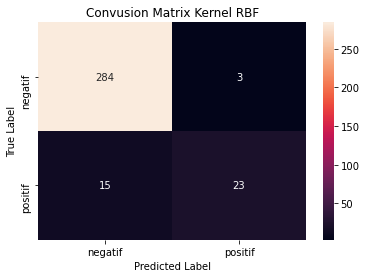

In [23]:
#RBF
cm=confusion_matrix(y_test, y_pred_rbf)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel RBF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
df_rbf = pd.DataFrame(model_rbf.cv_results_)
df_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113339,0.020798,0.027609,0.006924,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
1,0.121265,0.033236,0.029815,0.007878,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
2,0.117346,0.021915,0.029609,0.003232,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
3,0.091322,0.009913,0.021504,0.003204,0.001,1,"{'C': 0.001, 'gamma': 1}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
4,0.165817,0.028210,0.041105,0.007142,0.001,10,"{'C': 0.001, 'gamma': 10}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
5,0.161716,0.017588,0.041903,0.003808,0.001,100,"{'C': 0.001, 'gamma': 100}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
6,0.071105,0.005564,0.018300,0.003464,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
7,0.114312,0.019088,0.028705,0.007954,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
8,0.209721,0.015329,0.049805,0.006111,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16
9,0.465036,0.080883,0.115263,0.020817,0.01,1,"{'C': 0.01, 'gamma': 1}",0.861538,0.903846,0.865385,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,16


In [25]:
df_rbf[['param_C', 'param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.001,0.001,0.875000
1,0.001,0.01,0.875000
2,0.001,0.1,0.875000
3,0.001,1,0.875000
4,0.001,10,0.875000
5,0.001,100,0.875000
6,0.01,0.001,0.875000
7,0.01,0.01,0.875000
8,0.01,0.1,0.875000
9,0.01,1,0.875000


In [26]:
model_rbf.best_score_

0.9357692307692307

In [27]:
df_rbf.to_excel("ParameterRbf.xlsx")

In [28]:
#Penggunaan Kernel Sigmoid
svclassifier_sigmoid = SVC(kernel='sigmoid') 
print(svclassifier_sigmoid) 
#Implement SVM dengan Cross Validation 
model_sigmoid= GridSearchCV(estimator=svclassifier_sigmoid, param_grid=parameter_sigmoid, cv=cv) 
model_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 1, 5, 8, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [29]:
#SIGMOID
y_pred_sigmoid = model_sigmoid.predict(X_test)
print("\t\t  *EVALUASI KERNEL SIGMOID*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("\nReport:\n", classification_report(y_test, y_pred_sigmoid))
print("Best Parameters:", model_sigmoid.best_params_)

		  *EVALUASI KERNEL SIGMOID*
Confusion Matrix:
 [[282   5]
 [ 12  26]]

Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       287
           1       0.84      0.68      0.75        38

    accuracy                           0.95       325
   macro avg       0.90      0.83      0.86       325
weighted avg       0.95      0.95      0.95       325

Best Parameters: {'C': 100, 'coef0': 0, 'gamma': 0.01}


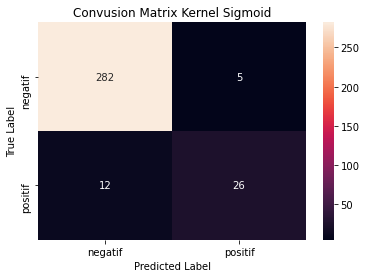

In [30]:
#SIGMOID
cm=confusion_matrix(y_test, y_pred_sigmoid)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Sigmoid")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
df_sigmoid = pd.DataFrame(model_sigmoid.cv_results_)
df_sigmoid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120756,0.017628,0.034319,0.018622,0.001,0,0.001,"{'C': 0.001, 'coef0': 0, 'gamma': 0.001}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
1,0.114657,0.026265,0.029817,0.014515,0.001,0,0.01,"{'C': 0.001, 'coef0': 0, 'gamma': 0.01}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
2,0.106149,0.013694,0.026913,0.008051,0.001,0,0.1,"{'C': 0.001, 'coef0': 0, 'gamma': 0.1}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
3,0.125278,0.020845,0.028822,0.006622,0.001,0,1,"{'C': 0.001, 'coef0': 0, 'gamma': 1}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
4,0.145294,0.030343,0.030815,0.002186,0.001,0,10,"{'C': 0.001, 'coef0': 0, 'gamma': 10}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.067001,0.004582,0.015001,0.004999,100,10,0.01,"{'C': 100, 'coef0': 10, 'gamma': 0.01}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
176,0.065104,0.005110,0.018001,0.003999,100,10,0.1,"{'C': 100, 'coef0': 10, 'gamma': 0.1}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
177,0.070002,0.004472,0.014001,0.004898,100,10,1,"{'C': 100, 'coef0': 10, 'gamma': 1}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23
178,0.065003,0.005000,0.019999,0.000003,100,10,10,"{'C': 100, 'coef0': 10, 'gamma': 10}",0.861538,0.903846,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875,0.018305,23


In [32]:
df_sigmoid[['param_C', 'param_gamma', 'param_coef0', 'mean_test_score']]

,param_C,param_gamma,param_coef0,mean_test_score
0,0.001,0.001,0,0.875
1,0.001,0.01,0,0.875
2,0.001,0.1,0,0.875
3,0.001,1,0,0.875
4,0.001,10,0,0.875
...,...,...,...,...
175,100,0.01,10,0.875
176,100,0.1,10,0.875
177,100,1,10,0.875
178,100,10,10,0.875


In [33]:
model_sigmoid.best_score_

0.9361538461538462

In [34]:
model_sigmoid.best_params_

{'C': 100, 'coef0': 0, 'gamma': 0.01}

In [35]:
df_sigmoid.to_excel("ParameterSigmoid.xlsx")

In [36]:
#Penggunaan Kernel Polynomial
svclassifier_poly = SVC(kernel='poly') 
print(svclassifier_poly) 
#Implement SVM dengan Cross Validation 
model_poly= GridSearchCV(estimator=svclassifier_poly, param_grid=parameter_poly, cv=cv) 
model_poly.fit(X_train, y_train)

SVC(kernel='poly')


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 1, 5, 8, 10], 'degree': [0, 1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [37]:
#POLYNOMIAL
y_pred_poly = model_poly.predict(X_test)
print("\t\t  *EVALUASI KERNEL POLYNOMIAL*")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nReport:\n", classification_report(y_test, y_pred_poly))
print("Best Parameters:", model_poly.best_params_)

		  *EVALUASI KERNEL POLYNOMIAL*
Confusion Matrix:
 [[283   4]
 [ 12  26]]

Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       287
           1       0.87      0.68      0.76        38

    accuracy                           0.95       325
   macro avg       0.91      0.84      0.87       325
weighted avg       0.95      0.95      0.95       325

Best Parameters: {'C': 0.1, 'coef0': 5, 'degree': 3, 'gamma': 0.1}


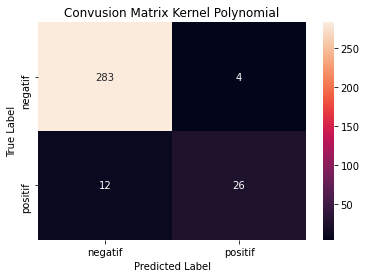

In [38]:
#POLYNOMIAL
cm=confusion_matrix(y_test, y_pred_poly)
class_label=["negatif", "positif"]
test=pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")
plt.title("Convusion Matrix Kernel Polynomial")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
df_poly = pd.DataFrame(model_poly.cv_results_)
df_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.115735,0.021037,0.027007,0.004605,0.001,0,0,0.001,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.861538,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,356
1,0.117762,0.010569,0.026614,0.004809,0.001,0,0,0.01,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.861538,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,356
2,0.108760,0.026901,0.025314,0.005337,0.001,0,0,0.1,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.861538,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,356
3,0.088539,0.010324,0.024312,0.005800,0.001,0,0,1,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma': 1}",0.861538,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,356
4,0.089522,0.024094,0.024206,0.006525,0.001,0,0,10,"{'C': 0.001, 'coef0': 0, 'degree': 0, 'gamma':...",0.861538,...,0.869231,0.880769,0.865385,0.907692,0.884615,0.865385,0.846154,0.875000,0.018305,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.237014,0.059142,0.041599,0.006249,100,10,3,0.01,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': ...",0.934615,...,0.938462,0.942308,0.915385,0.934615,0.946154,0.950000,0.923077,0.934231,0.010940,84
716,0.196810,0.033823,0.030201,0.005687,100,10,3,0.1,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': ...",0.934615,...,0.942308,0.946154,0.915385,0.934615,0.942308,0.950000,0.926923,0.935385,0.010292,47
717,0.207810,0.005327,0.035201,0.005232,100,10,3,1,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': 1}",0.930769,...,0.934615,0.942308,0.919231,0.942308,0.938462,0.953846,0.915385,0.934615,0.011792,70
718,0.253013,0.004751,0.049001,0.003000,100,10,3,10,"{'C': 100, 'coef0': 10, 'degree': 3, 'gamma': 10}",0.915385,...,0.930769,0.930769,0.911538,0.938462,0.923077,0.938462,0.903846,0.924231,0.013218,184


In [40]:
df_poly[['param_C', 'param_gamma', 'param_coef0', 'param_degree','mean_test_score']]

,param_C,param_gamma,param_coef0,param_degree,mean_test_score
0,0.001,0.001,0,0,0.875000
1,0.001,0.01,0,0,0.875000
2,0.001,0.1,0,0,0.875000
3,0.001,1,0,0,0.875000
4,0.001,10,0,0,0.875000
...,...,...,...,...,...
715,100,0.01,10,3,0.934231
716,100,0.1,10,3,0.935385
717,100,1,10,3,0.934615
718,100,10,10,3,0.924231


In [41]:
model_poly.best_score_

0.9369230769230767

In [42]:
df_poly.to_excel("ParameterPoly.xlsx")